In [2]:
import mdtraj as md
import barnaba as bb
import umap

traj = md.load("SL2_50K.xtc",top="SL5_sample.pdb",stride=2)
print(traj)
gvecs,res = bb.dump_gvec_traj(traj)

<mdtraj.Trajectory with 25001 frames, 537 atoms, 17 residues, and unitcells>


In [3]:
import barnaba.cluster as cc

gvecs = gvecs.reshape(gvecs.shape[0],-1)
print(gvecs.shape)

vint,wint = cc.pca(gvecs,nevecs=3)
#v2,w2 = cc.pca(gvecs2,nevecs=3)

print("# Cumulative explained variance of component: 1=%5.1f 2:=%5.1f 3=%5.1f" % (vint[0]*100,vint[1]*100,vint[2]*100))


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
fig, axs = plt.subplots(1,1,figsize=(10,10))
lhalf = int(gvecs.shape[0]/2)
plt.scatter(wint[:lhalf,0],wint[:lhalf,1],s=1)
plt.scatter(wint[lhalf:,0],wint[lhalf:,1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

(25001, 1156)
# Cumulative explained variance of component: 1= 27.6 2:= 35.2 3= 39.3


Text(0, 0.5, 'PC2')

In [4]:
fit = umap.UMAP()
u = fit.fit_transform(gvecs)

Text(0, 0.5, 'PC2')

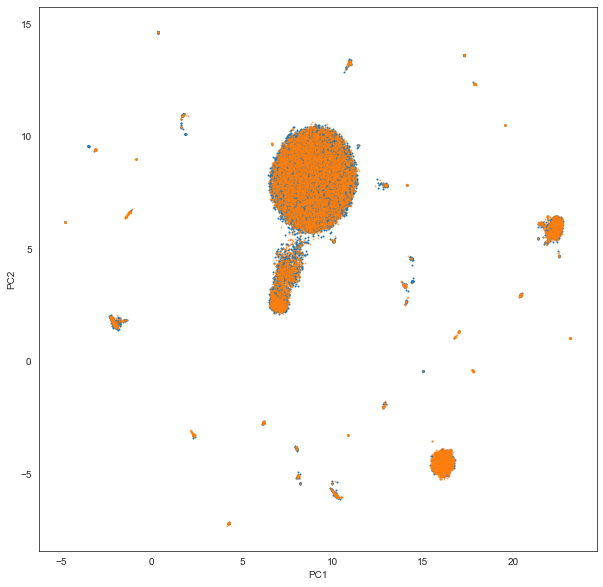

In [5]:
fig, axs = plt.subplots(1,1,figsize=(10,10))
plt.scatter(u[:lhalf,0],u[:lhalf,1],s=1)
plt.scatter(u[lhalf:,0],u[lhalf:,1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

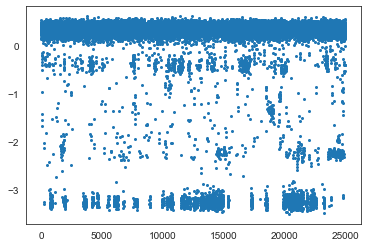

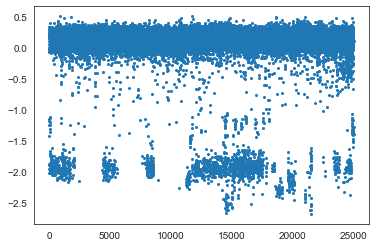

In [3]:
plt.plot(wint[:,0],"o",markersize=2)
plt.show()
plt.close()
plt.plot(wint[:,1],"o",markersize=2)

In [6]:
import numpy as np
ll=len(res)
new_labels, center_idx = cc.dbscan(gvecs,range(gvecs.shape[0]),eps=0.5,min_samples=50)

# eps:2.062 min_samples:50  nclusters: 7
#  silhouette score: 0.3300
# Avg silhouette: 0.3465 
# assigned samples :24289 total samples:25001 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 21838                1.166                0.481                0.857                0.374 00 4980
# 01 1842                0.839                0.440                0.620                0.375 01 9951
# 02 0326                0.926                0.490                0.735                0.407 02 16964
# 03 0074                0.781                0.492                0.548                0.416 04 11480
# 04 0072                0.734                0.462                0.529                0.395 03 1947
# 05 0069                0.720                0.520                0.573                0.456 06 24769
# 06 0068                0.711                0.488                0.562                0.418 05 23473


t1 4980
t1 9951
t1 16964
t1 11480
t1 1947
t1 24769
t1 23473


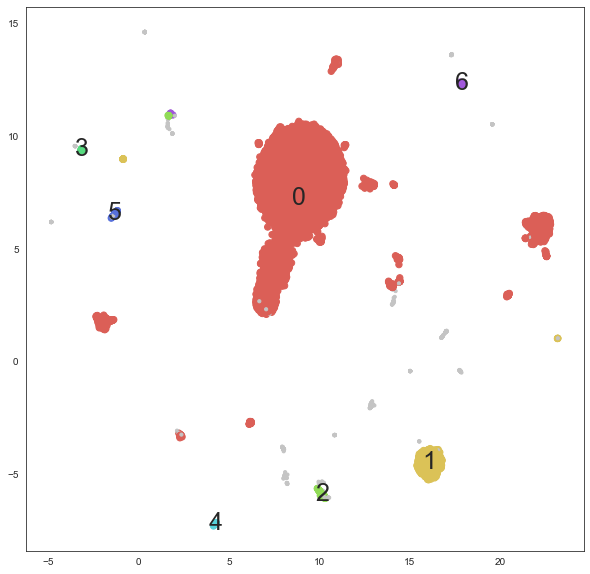

In [7]:
cp = sns.color_palette("hls",len(center_idx)+1)
colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in new_labels]
size = [40 if(j!=0) else 10 for j in new_labels]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecs.shape[0]
#plt.scatter(wint[:,0],wint[:,1],s=size,c=colors)
plt.scatter(u[:,0],u[:,1],s=size,c=colors)
for i,k in enumerate(center_idx):
    #plt.text(wint[k,0],wint[k,1],str(i),ha='center',va='center',fontsize=25)
    plt.text(u[k,0],u[k,1],str(i),ha='center',va='center',fontsize=25)
    print("t1",k)
    traj[k].save("center_SL2_%d.pdb" %i )